<a href="https://colab.research.google.com/github/JBalbuenaG/proyecto_DL/blob/main/3_KDEF_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Este script es similar al usando para entrenar el ResNet con la diferencia de que se carga el modelo pre-entrenado
#del VGG-16
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_path = '/content/drive/My Drive/Proyecto_DL/dataset_kdef/train'
valid_path = '/content/drive/My Drive/Proyecto_DL/dataset_kdef/test'
train_image_files = glob(train_path +'/*/*.jpg')
valid_image_files = glob(valid_path +'/*/*.jpg')

In [3]:
folders = glob(train_path + '/*')
print(folders)

['/content/drive/My Drive/Proyecto_DL/dataset_kdef/train/0', '/content/drive/My Drive/Proyecto_DL/dataset_kdef/train/1', '/content/drive/My Drive/Proyecto_DL/dataset_kdef/train/2', '/content/drive/My Drive/Proyecto_DL/dataset_kdef/train/3', '/content/drive/My Drive/Proyecto_DL/dataset_kdef/train/4', '/content/drive/My Drive/Proyecto_DL/dataset_kdef/train/5']


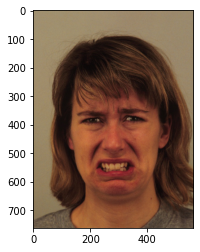

In [4]:
plt.imshow(image.load_img(np.random.choice(valid_image_files)))
plt.show()

In [5]:
IMAGE_SIZE = [200,200]
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE+[3],
    weights='imagenet',
    include_top=False)

ptm.trainable = False

In [6]:

K = len(folders) 
x = Flatten()(ptm.output)

model = Model(inputs=ptm.input, outputs=x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

In [7]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# batch_size = 128

# train_generator = gen.flow_from_directory(
#     train_path,
#     target_size=IMAGE_SIZE,
#     batch_size=batch_size,
#     class_mode = 'sparse'
# )

# valid_generator = gen.flow_from_directory(
#     valid_path,
#     target_size=IMAGE_SIZE,
#     batch_size=batch_size,
#     class_mode = 'sparse'
# )

In [9]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# N_train = len(train_image_files)
# N_valid = len(valid_image_files)

# feat = model.predict(np.random.random([1]+IMAGE_SIZE+[3]))
# D = feat.shape[1]

# X_train = np.zeros((N_train,D))
# Y_train = np.zeros(N_train)
# X_valid = np.zeros((N_valid,D))
# Y_valid = np.zeros(N_valid)

In [10]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# i = 0
# for x, y in train_generator:
#     features = model.predict(x)
  
#     sz = len(y)
#     X_train[i:i+sz]=features
#     Y_train[i:i+sz]=y

#     i += sz
#     if i%1280==0:
#         print(i)

#     if i>=N_train:
#         print('breaking now')
#         break

# print(i)

In [11]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# np.save('/content/drive/My Drive/Proyecto_DL/vectors/X_train_Kdef2VGG.npy', X_train)
# np.save('/content/drive/My Drive/Proyecto_DL/vectors/Y_train_Kdef2VGG.npy', Y_train)

In [12]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# i = 0
# for x, y in valid_generator:
#     features = model.predict(x)
  
#     sz = len(y) 
#     X_valid[i:i+sz]=features
#     Y_valid[i:i+sz]=y

#     i += sz
#     if i%1280==0:
#         print(i)

#     if i>=N_valid:
#         print('breaking now')
#         break

# print(i)

In [13]:
# # ACTIVAR SOLO LA PRIMERA VEZ
# np.save('/content/drive/My Drive/Proyecto_DL/vectors/X_valid_Kdef2VGG.npy', X_valid)
# np.save('/content/drive/My Drive/Proyecto_DL/vectors/Y_valid_Kdef2VGG.npy', Y_valid)

In [14]:
X_train = np.load('/content/drive/My Drive/Proyecto_DL/vectors/X_train_Kdef2VGG.npy')
Y_train = np.load('/content/drive/My Drive/Proyecto_DL/vectors/Y_train_Kdef2VGG.npy')
X_valid = np.load('/content/drive/My Drive/Proyecto_DL/vectors/X_valid_Kdef2VGG.npy')
Y_valid = np.load('/content/drive/My Drive/Proyecto_DL/vectors/Y_valid_Kdef2VGG.npy')

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

#Definición para el calculo de metricas multi-clase
def calculo_metricas(CM, emociones):
    
    emocion = []
    TruPos = []
    FalPos = []
    FalNeg = []
    TruNeg = []
    acc = []
    prec = []
    recall = []
    f1 = []
    
    total = np.sum(CM)
    
    for i in range(len(emociones)):
       
        TP = CM[i][i]
        FP = sum(CM[:,i])-TP
        FN = sum(CM[i,:])-TP
        TN = total - TP-FN-FP
        a = (TP+TN)/(TP+TN+FN+FP)
        p = TP/(TP+FP)
        r = TP/(TP+FN)
        f = 2*(r*p)/(r+p)
        
        emocion.append(emociones[i])
        TruPos.append(TP)
        FalPos.append(FP)
        TruNeg.append(TN)
        acc.append(a)
        prec.append(p)
        recall.append(r)
        f1.append(f)
    
    metricas = pd.DataFrame()
    metricas['Emociones']=emocion
    metricas['Accuracy']=acc
    metricas['Precision']=prec
    metricas['Recall']=recall
    metricas['F1-Score']=f1
    
    return metricas

def graf_confusion_matrix(CM, emociones,emb):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(CM,annot=True,fmt='',xticklabels=emociones,yticklabels=emociones, ax=ax, cmap='Blues');
    ax.set_title('Matriz de confusión '+emb);
    ax.set_xlabel('Valores Predecidos');
    ax.set_ylabel('Valores Verdaderos');
    
def graficar_historia_entrenamiento(log, metric='accuracy'):
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(log.history['val_loss'], label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history[metric], label='train')
    ax2.plot(log.history['val_'+metric], label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel(metric)
    #ax2.set_ylim((0.0, 1.0))
    for ax in axes: ax.legend()

In [16]:
feat = model.predict(np.random.random([1]+IMAGE_SIZE+[3]))
D = feat.shape[1]

#Modelo de red neuronal para clasificación
#i = Input(shape=(D,))
#x = Dense(4096, activation='relu')(i)
#x = Dropout(0.2)(x)
#x = Dense(4096, activation='relu')(x)
#x = Dense(6, activation='softmax')(x)

#Modelo de red neuronal para clasificación multiclase
i = Input(shape=(D,))
x = Dense(1024, activation='relu')(i)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(6, activation='softmax')(x)

emo_model = Model(i ,x)

# entrenado con metrica 'accuracy' o 'tf.keras.metrics.sparse_categorical_accuracy'
emo_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics= tf.keras.metrics.sparse_categorical_accuracy
)

In [17]:
r = emo_model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_valid,Y_valid)
)

Epoch 1/20
53/53 [==============================] - 7s 139ms/step - loss: 6.4075 - sparse_categorical_accuracy: 0.2382 - val_loss: 1.6710 - val_sparse_categorical_accuracy: 0.2964
Epoch 2/20
53/53 [==============================] - 7s 138ms/step - loss: 1.5595 - sparse_categorical_accuracy: 0.3824 - val_loss: 1.5385 - val_sparse_categorical_accuracy: 0.4107
Epoch 3/20
53/53 [==============================] - 7s 139ms/step - loss: 1.3225 - sparse_categorical_accuracy: 0.4741 - val_loss: 1.4144 - val_sparse_categorical_accuracy: 0.4583
Epoch 4/20
53/53 [==============================] - 7s 136ms/step - loss: 1.1603 - sparse_categorical_accuracy: 0.5602 - val_loss: 1.2347 - val_sparse_categorical_accuracy: 0.5119
Epoch 5/20
53/53 [==============================] - 7s 137ms/step - loss: 1.0013 - sparse_categorical_accuracy: 0.6060 - val_loss: 1.2610 - val_sparse_categorical_accuracy: 0.5071
Epoch 6/20
53/53 [==============================] - 7s 131ms/step - loss: 0.8609 - sparse_categorica

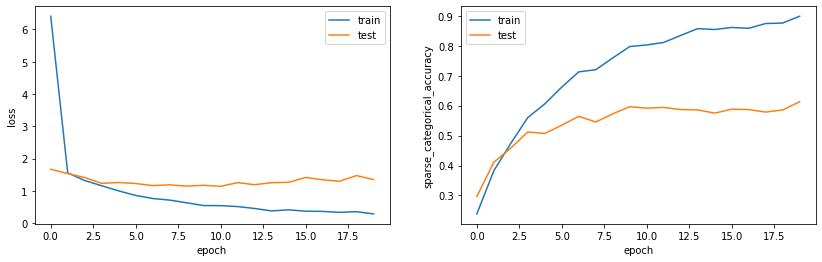

In [18]:
graficar_historia_entrenamiento(r, metric='sparse_categorical_accuracy')

In [19]:
p = emo_model.predict(X_valid)
pred = np.argmax(p, axis=1)

In [20]:
Y_valid = Y_valid.astype(int)

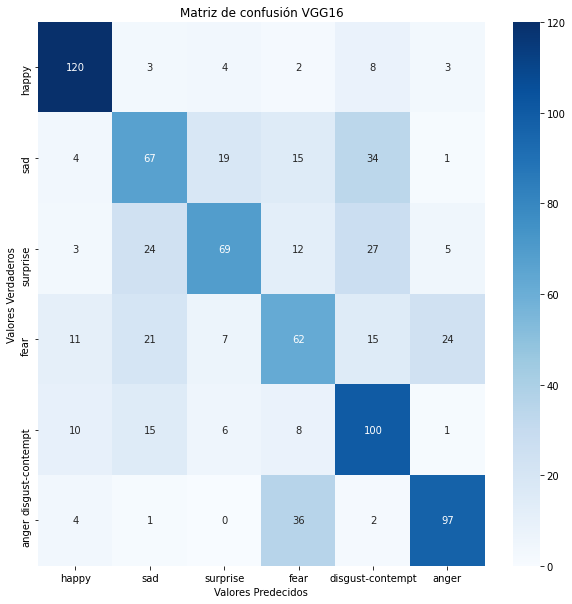

In [21]:
emo_dict = {0: 'happy', 1: 'sad', 2: 'surprise', 3: 'fear', 4: 'disgust-contempt', 5: 'anger'}
emociones_1 = list(emo_dict.values())

CM_VGG = confusion_matrix(Y_valid, pred)
graf_confusion_matrix(CM_VGG, emociones_1 ,'VGG16')

In [22]:
m1 = calculo_metricas(CM_VGG, emociones_1)
m1

,Emociones,Accuracy,Precision,Recall,F1-Score
0,happy,0.938095,0.789474,0.857143,0.821918
1,sad,0.836905,0.511450,0.478571,0.494465
2,surprise,0.872619,0.657143,0.492857,0.563265
3,fear,0.820238,0.459259,0.442857,0.450909
4,disgust-contempt,0.850000,0.537634,0.714286,0.613497
5,anger,0.908333,0.740458,0.692857,0.715867


In [23]:
m1.mean()

Accuracy     0.871032
Precision    0.615903
Recall       0.613095
F1-Score     0.609987
dtype: float64

In [24]:
emo_model.save('top_VGG16_KDEF_emotions_v1.h5')